In [1]:
import numpy as np
import pandas as pd
import re
#import nltk
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Preprocessing has already been performed on this dataset.

In [3]:
data = pd.read_csv('data_cleaned (1).csv')

In [4]:
data.head()

,Unnamed: 0,score,tweet
0,0,0,switchfoot awww thats a bummer you shoulda get...
1,1,0,be upset that he cant update his facebook by t...
2,2,0,kenichan i dive many time for the ball manage ...
3,3,0,my whole body feel itchy and like it on fire
4,4,0,nationwideclass no it not behave at all im mad...


After importing the dataset, we checked for null values and removed them using dropna() on only rows.

In [5]:
data.isnull().sum()

Unnamed: 0     0
score          0
tweet         23
dtype: int64

In [6]:
data=data.dropna() 
data.reset_index(drop=True, inplace=True)
print(data.isna().sum())

Unnamed: 0    0
score         0
tweet         0
dtype: int64


Replaced all '1' in target variable to '4' and visualized the target variable using Seaborn.countplot().

In [7]:
data['score'] = data['score'].replace(4, 1)

0    799995
1    799982
Name: score, dtype: int64
C:\Users\Ajay\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='score', ylabel='count'>

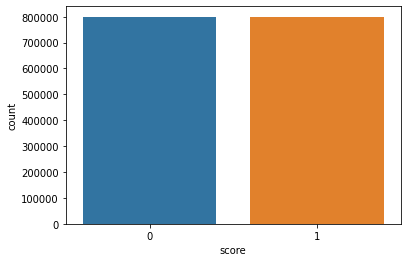

In [8]:
print (data['score'].value_counts())
sns.countplot(data['score'])

Rather than using the whole dataset, we used a sample of it.

In [9]:
df = data.sample(n=30000)
df

,Unnamed: 0,score,tweet
1273125,1273140,1,yay im gonna leave now for buy a new phone gon...
1008972,1008979,1,stretch crunch leg lifts pushup run shower tim...
960736,960743,1,new paramore song gaahhh it fantasmagorical
1085618,1085629,1,do anyone want to build me a house with a bask...
1527784,1527805,1,johnhegs tweety ahhh thats well
...,...,...,...
293799,293800,0,thomasfiss i wouldnt know maybe you should tak...
662881,662885,0,thoughtsigns do it update who be a cylon and w...
964150,964157,1,oops im online
176094,176095,0,jamiebower you should come to chile and your b...


In [10]:
features=df.iloc[:,2].values
labels=df.iloc[:,1].values
print(features.shape)

(30000,)


Here we used TfidfVectorizer for feature extraction. TfidfVectorizer extracts all the words from a set of documents and then based on the frequency of the word in different documents it generates a value for it. After this rather than having various words, we get a array of numbers such as [0,0,0,0.........0,0,0,0].

For understanding this algorithm we need to understand mathematical meaning of TF-IDF.Here 'TF' is 'Term frequency' and 'IDF' is 'Inverse document frequency'.

The formula for TF is given by => Number of times a term is repeated in a document
                                ----------------------------------------------------
                                        Number of terms in that document

And, formula for IDF is given by =>      Total number of documents
                                   ---------------------------------------
                                    Number of documents containg the term

After calculating both of these, the weight for word is given by = (TF)*(IDF)

Here, we only extracted best 50000 features or terms.
                                    

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer(lowercase=False,max_features = 50000,stop_words='english')

x_prc = vector.fit(features)

In [12]:
x_prc = vector.transform(features)

In [13]:
print(x_prc.shape)

(30000, 40002)


Here, we used VarianceThreshold to filter features as we want only the best features and we also want to reduce the calculation cost.

As even at threshold = 0.00001 we have 18000-19000 featuers and they are only repeating only one or two times. It gets worse as we increase the sample size.

Our goal was to select best 5500 - 7500 features for the current sample.

In [14]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(x_prc)

VarianceThreshold(threshold=0)

In [15]:
constant_filter.get_support().sum()

40002

In [24]:
Quasi_fil = VarianceThreshold(threshold=0.0000232)
Quasi_fil.fit(x_prc)

VarianceThreshold(threshold=2.32e-05)

In [25]:
Quasi_fil.get_support().sum()

6279

In [26]:
filtered_x_prc = Quasi_fil.transform(x_prc)

Now after doing all that we finally changed our values to an array. It is the most ram consuming part. From this we saw that sample size = 30000 - 50000 is the best.

In [27]:
x_practice = filtered_x_prc.toarray()

In [28]:
print(x_practice)
print(x_practice.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(30000, 6279)


Here we generated a list with index values as 'word_i' where i is 0,1,2,3..... array.shape[1]. These will be useful for futher making a dataframe.

In [29]:
# for getting dictinory keys

ar = []

for i in range(0,1):
	ar.append([])
 
#print(len(ar))

for i in range(x_practice.shape[1]):
  ar[0].append('word_'+str(i))

print(len(ar[0]))

6279


We created a dataframe with our weight list and index_values = ar. We did to make further process easier to understand.

In [30]:
dataframe = pd.DataFrame(x_practice,columns=ar)

In [31]:
dataframe.head()

,word_0,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,word_9,...,word_6269,word_6270,word_6271,word_6272,word_6273,word_6274,word_6275,word_6276,word_6277,word_6278
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
dataframe.shape

(30000, 6279)

### Linear Discriminant Analysis

From here we will get one value as array.


In [33]:
lda=  LinearDiscriminantAnalysis()
x_ld_prc = lda.fit(x_practice,labels)

In [34]:
x_ld_prc = lda.transform(x_practice)

In [36]:
print(x_ld_prc.shape)

(30000, 1)


### Model fitting

These are the various models which used in this code - RandomForestClassifier
                                                       LinearSVC

Where out of both LinearSVC gave the best results.

In [37]:
X_train,X_test,Y_train,Y_test = train_test_split(x_ld_prc,labels,test_size=0.2)

In [38]:
X_train.shape,X_test.shape,Y_test.shape

((24000, 1), (6000, 1), (6000,))

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=0)

In [40]:
%%time
model1 = rf.fit(X_train,Y_train)
y_pred = model1.predict(X_test)

print(accuracy_score(Y_test,y_pred))

0.757
Wall time: 4.25 s


In [41]:
svm = LinearSVC()

In [42]:
%%time
model3 = svm.fit(X_train,Y_train)
y1_pred = model3.predict(X_test)

print(accuracy_score(Y_test,y1_pred))

0.8236666666666667
Wall time: 150 ms


### Without LDA

Here we checked results if we dont used LDA on the dataset. Some of the observation which we made -

1. As expected the time for model fitting has a significant difference.

2. But the most valuable observation was that without LDA our model suffered with low accuracy, its accuracy was even worse than the Radom Forest model which performed much worse compared to LinearSVC last time.

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x_practice,labels,test_size=0.2)

In [44]:
%%time
Model = svm.fit(x_train,y_train)
predict = Model.predict(x_test)

print(accuracy_score(y_test,predict))

0.7326666666666667
Wall time: 1.27 s


# THIS IS IT
